<a href="https://colab.research.google.com/github/sai-hemanth-kalidindi/Formula-1-Crash-Trends/blob/main/f1_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving circuits.csv to circuits.csv


{'circuits.csv': b'circuitId,circuitRef,name,location,country,lat,lng,alt,url\n1,"albert_park","Albert Park Grand Prix Circuit","Melbourne","Australia",-37.8497,144.968,10,"http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit"\n2,"sepang","Sepang International Circuit","Kuala Lumpur","Malaysia",2.76083,101.738,18,"http://en.wikipedia.org/wiki/Sepang_International_Circuit"\n3,"bahrain","Bahrain International Circuit","Sakhir","Bahrain",26.0325,50.5106,7,"http://en.wikipedia.org/wiki/Bahrain_International_Circuit"\n4,"catalunya","Circuit de Barcelona-Catalunya","Montmel\xc3\xb3","Spain",41.57,2.26111,109,"http://en.wikipedia.org/wiki/Circuit_de_Barcelona-Catalunya"\n5,"istanbul","Istanbul Park","Istanbul","Turkey",40.9517,29.405,130,"http://en.wikipedia.org/wiki/Istanbul_Park"\n6,"monaco","Circuit de Monaco","Monte-Carlo","Monaco",43.7347,7.42056,7,"http://en.wikipedia.org/wiki/Circuit_de_Monaco"\n7,"villeneuve","Circuit Gilles Villeneuve","Montreal","Canada",45.5,-73.5228,13,"http:

In [ ]:
import os
os.listdir()


['.config', 'f1_data', 'circuits.csv', 'sample_data']

In [ ]:
import os
os.listdir("f1_data")


[]

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving circuits.csv to circuits (1).csv


In [ ]:
import os
os.listdir()


['.config', 'circuits (1).csv', 'f1_data', 'circuits.csv', 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("f1_data")


In [ ]:
# Merge results with status (for crash reasons)
merged = results.merge(status, on='statusId', how='left')

# Merge with races (to get year info)
merged = merged.merge(races[['raceId', 'year']], on='raceId', how='left')

# Preview merged dataset
merged[['raceId', 'driverId', 'year', 'status']].head()


,raceId,driverId,year,status
0,18,1,2008,Finished
1,18,2,2008,Finished
2,18,3,2008,Finished
3,18,4,2008,Finished
4,18,5,2008,Finished


In [ ]:
# Define crash keywords (feel free to expand)
crash_keywords = ['Accident', 'Collision', 'Spun off', 'Fatal']

# Filter rows where 'status' indicates crash
crashes = merged[merged['status'].str.contains('|'.join(crash_keywords), case=False, na=False)]

# Group by year to count number of crashes
crashes_by_year = crashes.groupby('year').size()
crashes_by_year = crashes_by_year[crashes_by_year.index >= 1950]  # filter valid years only

# Show result
crashes_by_year.head()


,0
year,
1950,15
1951,10
1952,6
1953,17
1954,18


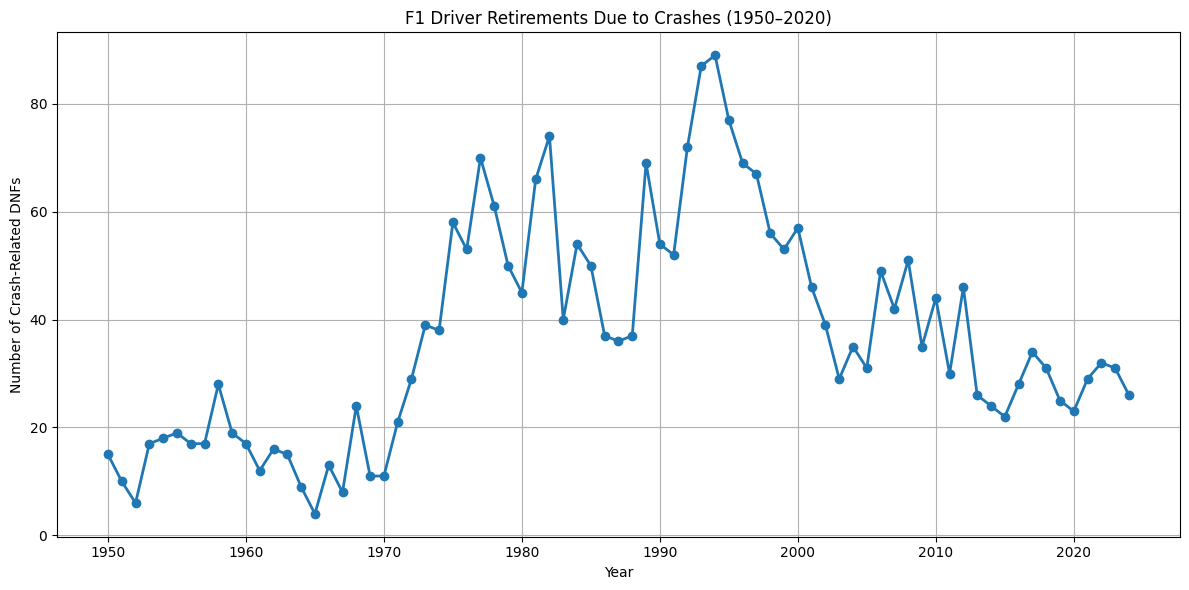

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
crashes_by_year.plot(kind='line', marker='o', linewidth=2)
plt.title("F1 Driver Retirements Due to Crashes (1950–2020)")
plt.xlabel("Year")
plt.ylabel("Number of Crash-Related DNFs")
plt.grid(True)
plt.tight_layout()
plt.show()


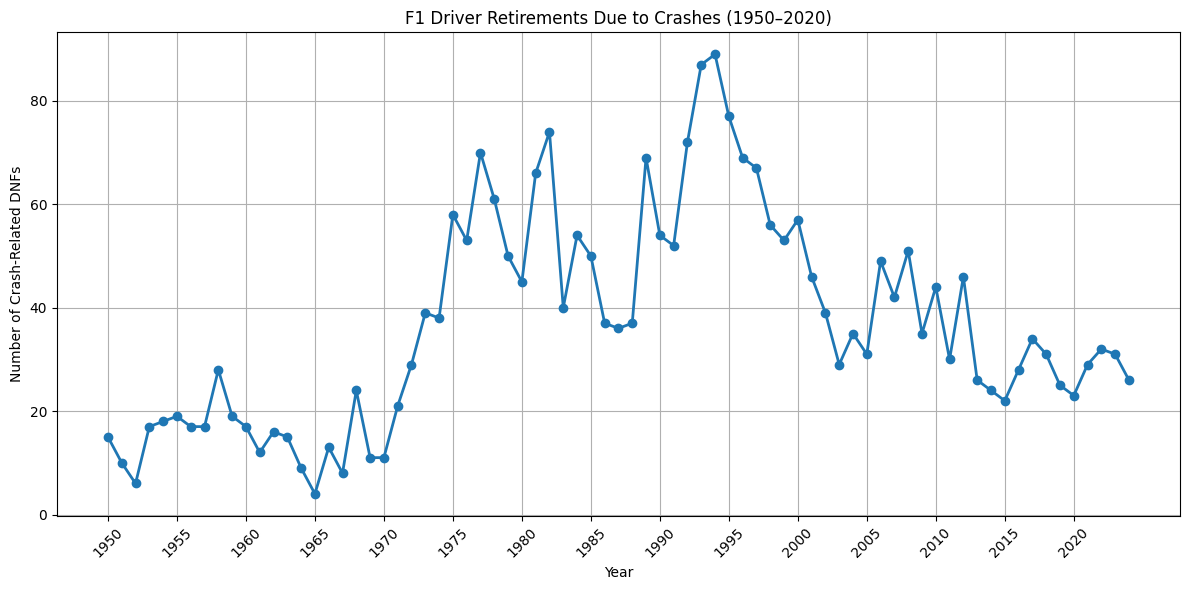

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
crashes_by_year.plot(kind='line', marker='o', linewidth=2)

plt.title("F1 Driver Retirements Due to Crashes (1950–2020)")
plt.xlabel("Year")
plt.ylabel("Number of Crash-Related DNFs")

# Set x-axis ticks every 5 years
plt.xticks(ticks=range(1950, 2025, 5), rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


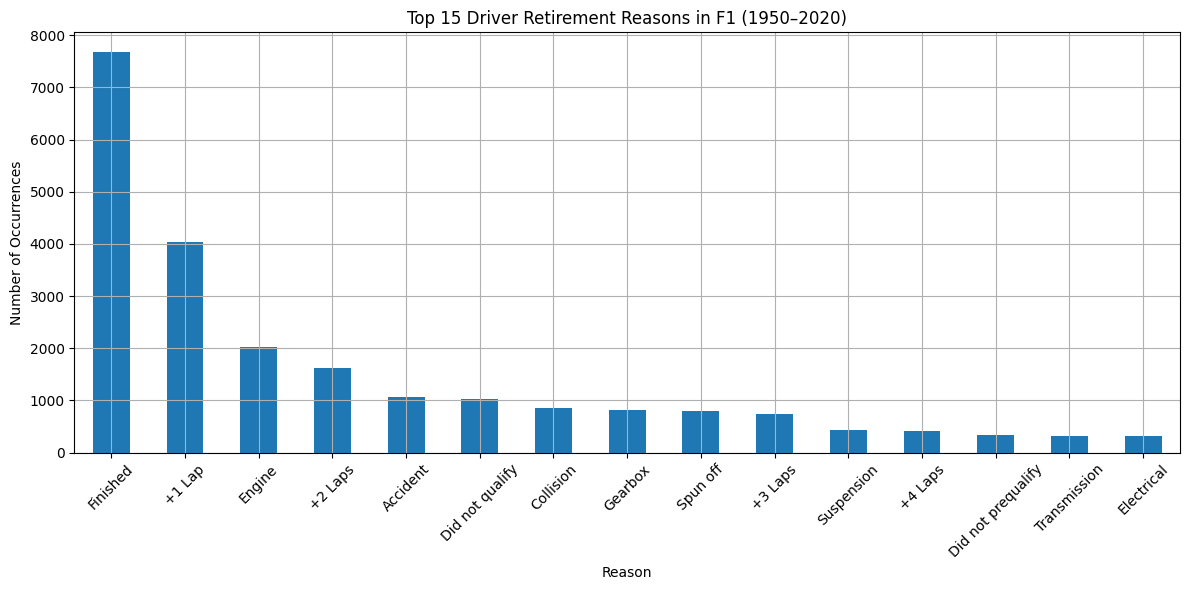

In [ ]:
# Top 15 most common DNF status reasons
status_counts = merged['status'].value_counts().head(15)

# Plot it
plt.figure(figsize=(12, 6))
status_counts.plot(kind='bar')
plt.title("Top 15 Driver Retirement Reasons in F1 (1950–2020)")
plt.xlabel("Reason")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Merge circuits to get names
merged_with_circuits = merged.merge(circuits[['circuitId', 'name']], on='circuitId', how='left')

# Filter crash-related rows
crash_circuits = merged_with_circuits[merged_with_circuits['status'].str.contains('|'.join(crash_keywords), case=False, na=False)]

# Count crashes by circuit
top_crash_tracks = crash_circuits['name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
top_crash_tracks.plot(kind='bar')
plt.title("Top 10 Circuits with Most Crash-Related DNFs (1950–2020)")
plt.xlabel("Circuit")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'circuitId'

In [ ]:
# Re-merge including circuitId from races
merged = results.merge(status, on='statusId', how='left')
merged = merged.merge(races[['raceId', 'year', 'circuitId']], on='raceId', how='left')


In [ ]:
# Merge with circuit names
merged_with_circuits = merged.merge(circuits[['circuitId', 'name']], on='circuitId', how='left')


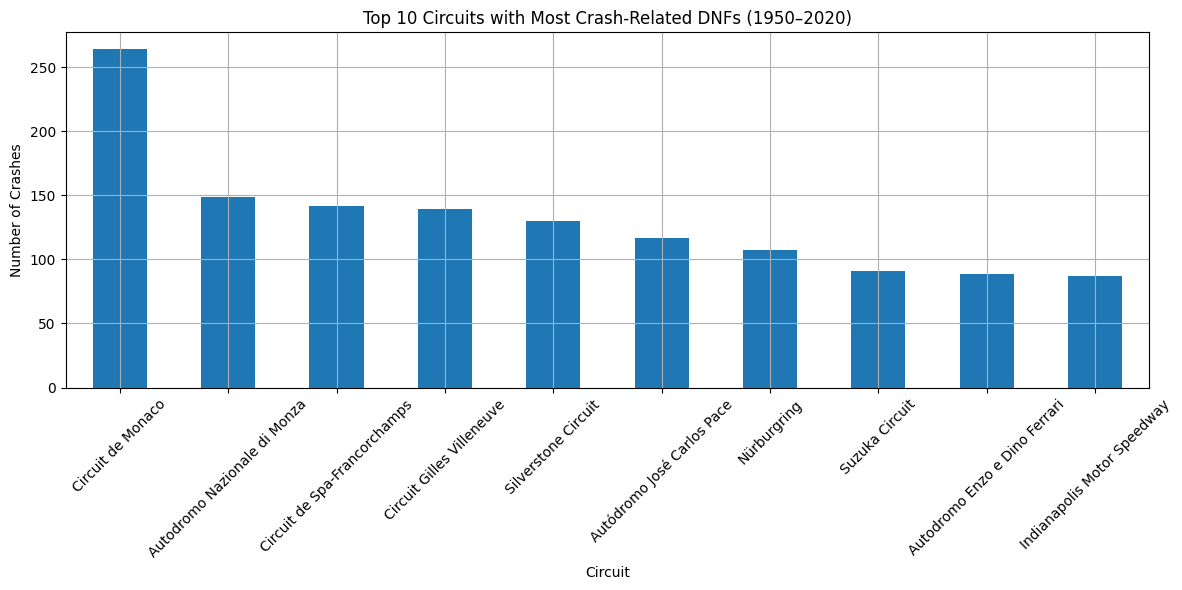

In [ ]:
# Filter crash-related rows
crash_circuits = merged_with_circuits[merged_with_circuits['status'].str.contains('|'.join(crash_keywords), case=False, na=False)]

# Count crashes by circuit
top_crash_tracks = crash_circuits['name'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_crash_tracks.plot(kind='bar')
plt.title("Top 10 Circuits with Most Crash-Related DNFs (1950–2020)")
plt.xlabel("Circuit")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate 5-year rolling average for crashes per year
crashes_by_year_rolling = crashes_by_year.rolling(window=5, min_periods=1).mean()


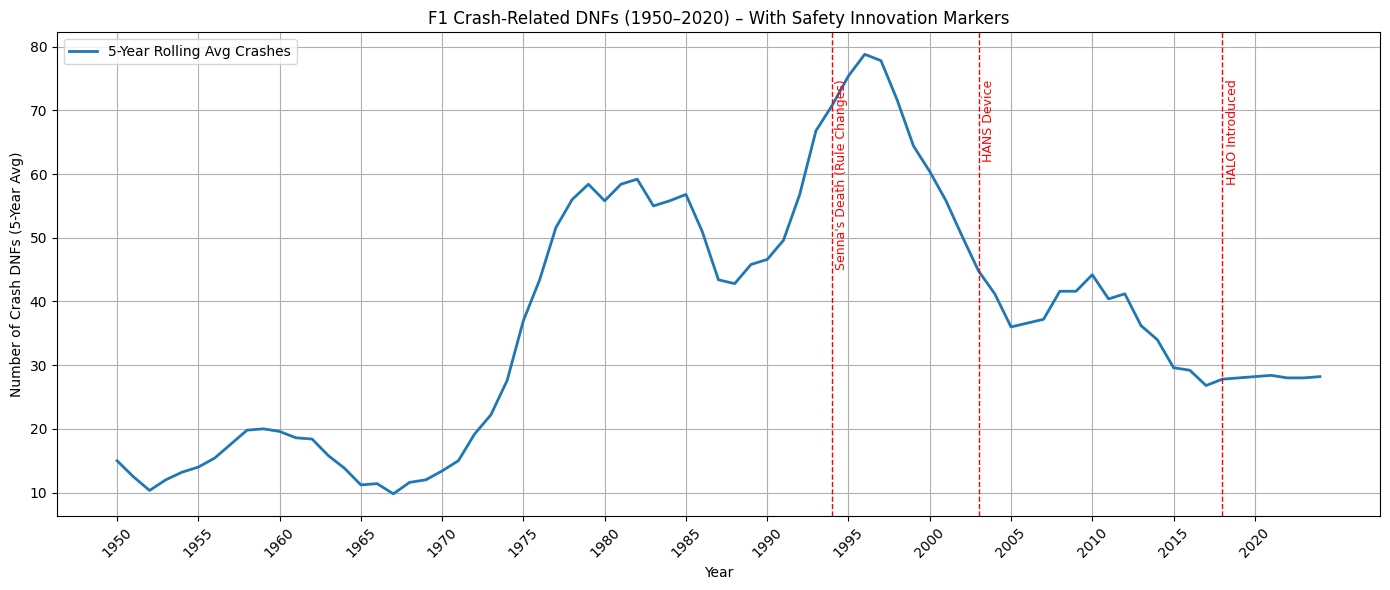

In [ ]:
import matplotlib.pyplot as plt

# Set up plot
plt.figure(figsize=(14, 6))
plt.plot(crashes_by_year_rolling.index, crashes_by_year_rolling.values, label='5-Year Rolling Avg Crashes', linewidth=2)

# Highlight key safety innovation years
innovation_years = {
    1994: "Senna's Death (Rule Changes)",
    2003: "HANS Device",
    2018: "HALO Introduced"
}

for year, label in innovation_years.items():
    plt.axvline(x=year, color='red', linestyle='--', linewidth=1)
    plt.text(year + 0.2, max(crashes_by_year_rolling.values)*0.95, label, rotation=90, verticalalignment='top', fontsize=9, color='red')

# Final touches
plt.title("F1 Crash-Related DNFs (1950–2020) – With Safety Innovation Markers")
plt.xlabel("Year")
plt.ylabel("Number of Crash DNFs (5-Year Avg)")
plt.xticks(ticks=range(1950, 2025, 5), rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
before_halo = crashes_by_year[(crashes_by_year.index >= 2010) & (crashes_by_year.index < 2018)].mean()
after_halo = crashes_by_year[(crashes_by_year.index >= 2018)].mean()

print("Average Crashes (2010–2017):", round(before_halo, 2))
print("Average Crashes (2018–2020):", round(after_halo, 2))


Average Crashes (2010–2017): 31.75
Average Crashes (2018–2020): 28.14


<ipython-input-28-9ec771b8b94c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes['decade'] = (crashes['year'] // 10) * 10


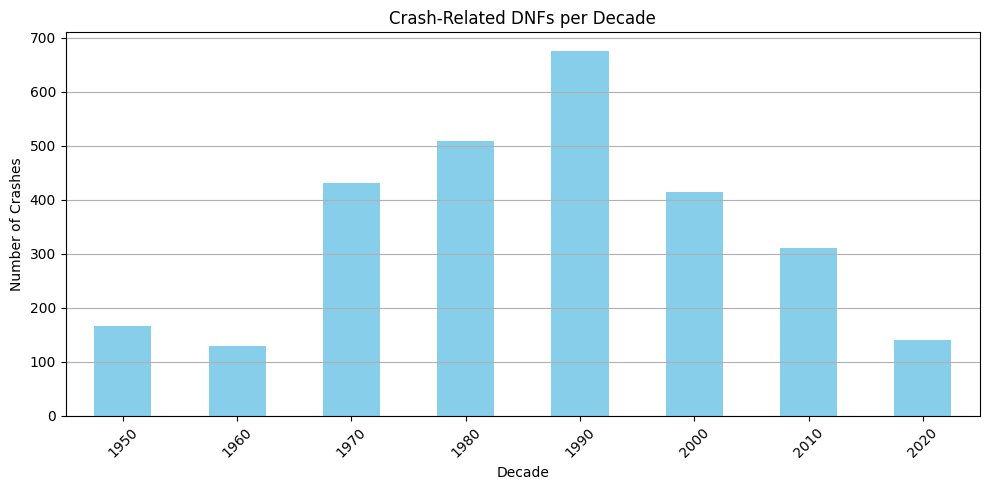

In [ ]:
# Create a new column for decade
crashes['decade'] = (crashes['year'] // 10) * 10

# Group by decade
crashes_by_decade = crashes.groupby('decade').size()

# Plot
crashes_by_decade.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Crash-Related DNFs per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


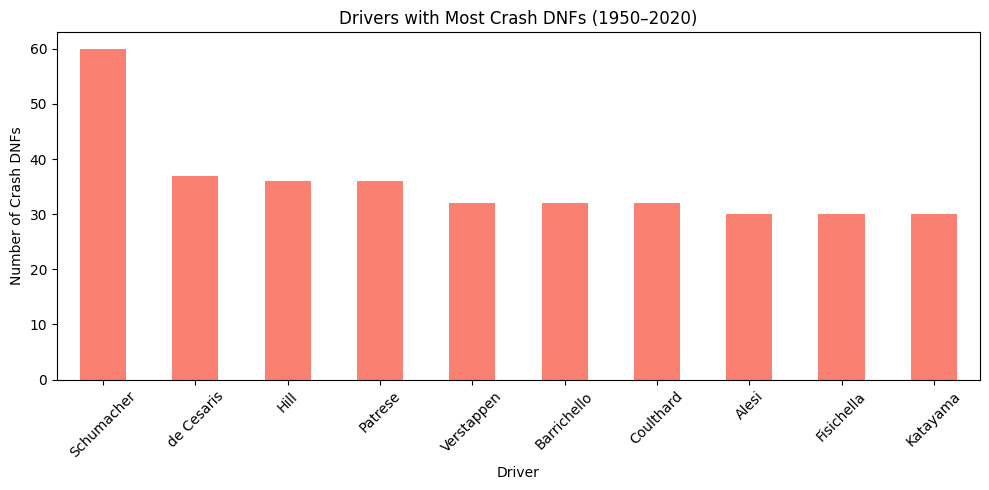

In [ ]:
# Merge driver names
crash_drivers = crashes.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Top 10 drivers with most crash DNFs
top_crash_drivers = crash_drivers['surname'].value_counts().head(10)

# Plot
top_crash_drivers.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title("Drivers with Most Crash DNFs (1950–2020)")
plt.xlabel("Driver")
plt.ylabel("Number of Crash DNFs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


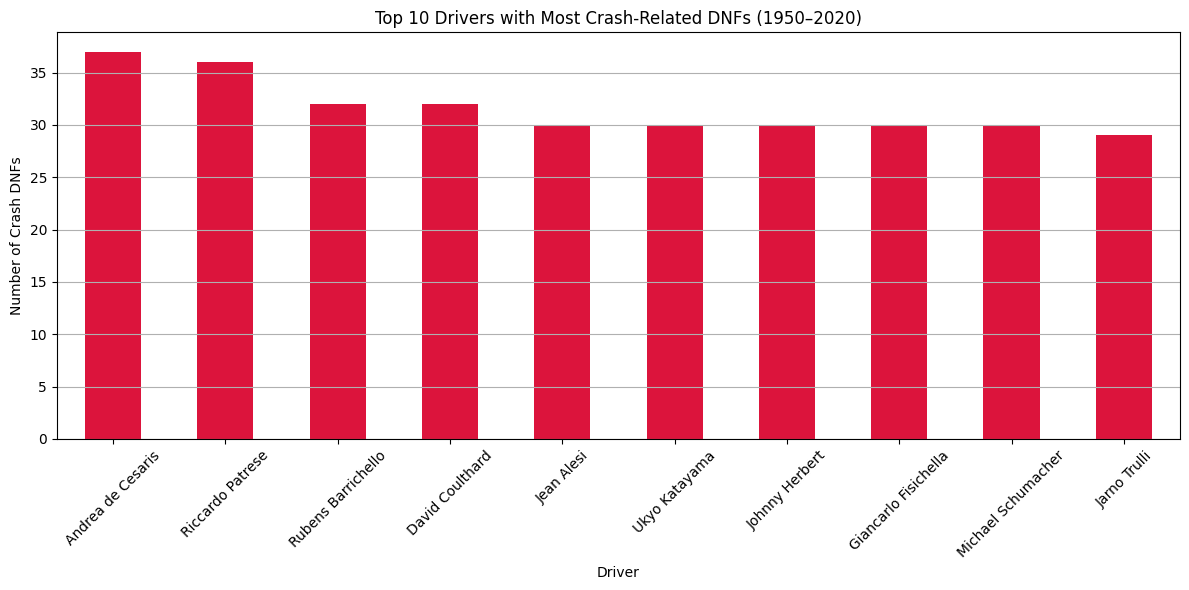

In [ ]:
# Merge full driver names into crashes
crash_drivers = crashes.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

# Create a full name column
crash_drivers['full_name'] = crash_drivers['forename'] + ' ' + crash_drivers['surname']

# Count crash DNFs per driver
top_crash_drivers = crash_drivers['full_name'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_crash_drivers.plot(kind='bar', color='crimson')
plt.title("Top 10 Drivers with Most Crash-Related DNFs (1950–2020)")
plt.xlabel("Driver")
plt.ylabel("Number of Crash DNFs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [ ]:
modern_crashes = crash_drivers[crash_drivers['year'] >= 2000]
top_modern = modern_crashes['full_name'].value_counts().head(10)


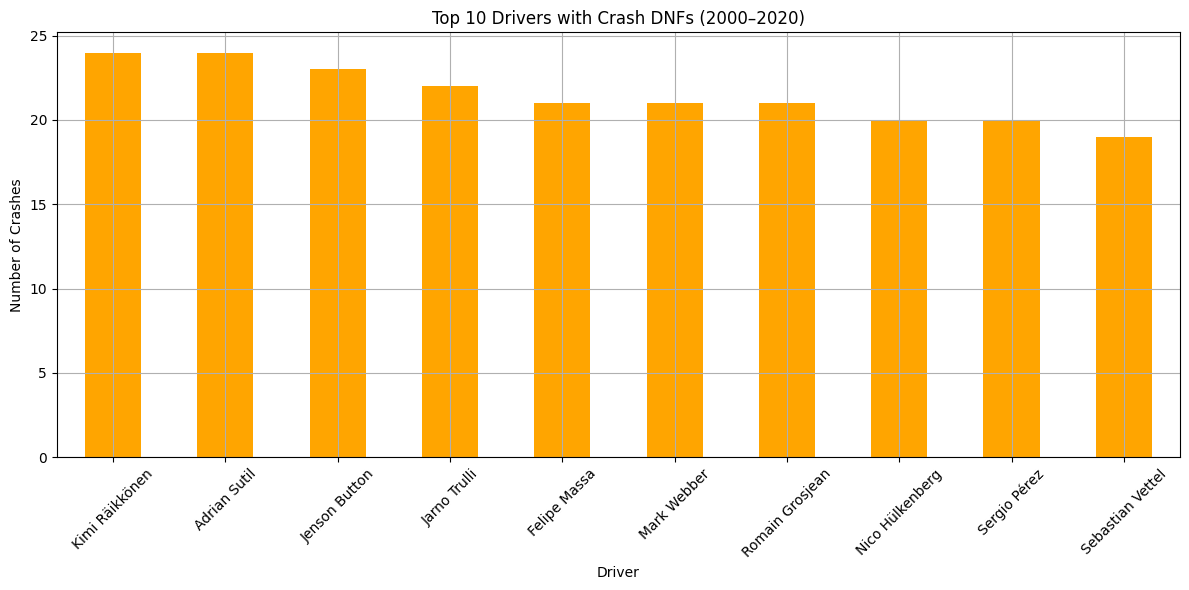

In [ ]:
# Filter for crashes from 2000 onward
modern_crashes = crashes[crashes['year'] >= 2000]

# Merge driver names
modern_crashes = modern_crashes.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
modern_crashes['full_name'] = modern_crashes['forename'] + ' ' + modern_crashes['surname']

# Top 10 modern drivers with most crash DNFs
top_modern = modern_crashes['full_name'].value_counts().head(10)

# Plot
top_modern.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title("Top 10 Drivers with Crash DNFs (2000–2020)")
plt.xlabel("Driver")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
